In [11]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
#import covid dataset
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
cdf = pd.read_csv(url, index_col=0)

#inspect DataFrame
cdf.head(5)

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
UID,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [13]:
#reset UID index to simplify for processing
cdf.reset_index(drop=True, inplace=True)

#inspect new DataFrame with index
cdf.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


### Q1
##### Create a visualization that shows all of the counties in Utah as a time series, similar to the one shown in slide 22 during the lecture. The graphic should:
- Show cases over time
- Have all counties plotted in a background color (something like grey)
- Have a single county plotted in a contrasting color (something not grey)
- Have well formatted dates as the X axis

In [19]:
#create new DataFrame filtered to only Utah
ut_df = cdf[cdf['Province_State'] == 'Utah']

#inspect new DataFrame
ut_df.head(5)


,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
UID,,,,,,,,,,,,,,,,,,,,,
84070015,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,"Bear River, Utah, US",...,58041,58041,58131,58131,58131,58131,58131,58131,58131,58205
84049001,US,USA,840,49001.0,Beaver,Utah,US,38.356571,-113.234223,"Beaver, Utah, US",...,0,0,0,0,0,0,0,0,0,0
84049003,US,USA,840,49003.0,Box Elder,Utah,US,41.521068,-113.083282,"Box Elder, Utah, US",...,0,0,0,0,0,0,0,0,0,0
84049005,US,USA,840,49005.0,Cache,Utah,US,41.723306,-111.744367,"Cache, Utah, US",...,0,0,0,0,0,0,0,0,0,0
84049007,US,USA,840,49007.0,Carbon,Utah,US,39.648348,-110.587251,"Carbon, Utah, US",...,0,0,0,0,0,0,0,0,0,0


In [65]:
#Non-date columns
non_date_columns = ['iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key']

# Melt the DataFrame, treating non-date columns as identifiers
utah_melt = ut_df.melt(
    id_vars=non_date_columns,  # Keep these columns
    var_name='Date',          # New date column
    value_name='Cases'        # New cases column
)

# Convert Date format
utah_melt['Date'] = pd.to_datetime(utah_melt['Date'],format='%m/%d/%y')

#inspect new DataFrame
utah_melt.head(5)

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Cases
0,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,"Bear River, Utah, US",2020-01-22,0
1,US,USA,840,49001.0,Beaver,Utah,US,38.356571,-113.234223,"Beaver, Utah, US",2020-01-22,0
2,US,USA,840,49003.0,Box Elder,Utah,US,41.521068,-113.083282,"Box Elder, Utah, US",2020-01-22,0
3,US,USA,840,49005.0,Cache,Utah,US,41.723306,-111.744367,"Cache, Utah, US",2020-01-22,0
4,US,USA,840,49007.0,Carbon,Utah,US,39.648348,-110.587251,"Carbon, Utah, US",2020-01-22,0


In [66]:
#rename Admin2 to County for processing
utah_melt.rename(columns={'Admin2': 'County'}, inplace=True)

#sort values in chronological order
utah_melt = utah_melt.sort_values(by=['County', 'Date'])

#create new column - New Cases - and calculate the difference between daily cases, make sure no value can be less than 0
utah_melt['New Cases'] = utah_melt.groupby('County')['Cases'].diff().fillna(0).clip(lower=0)


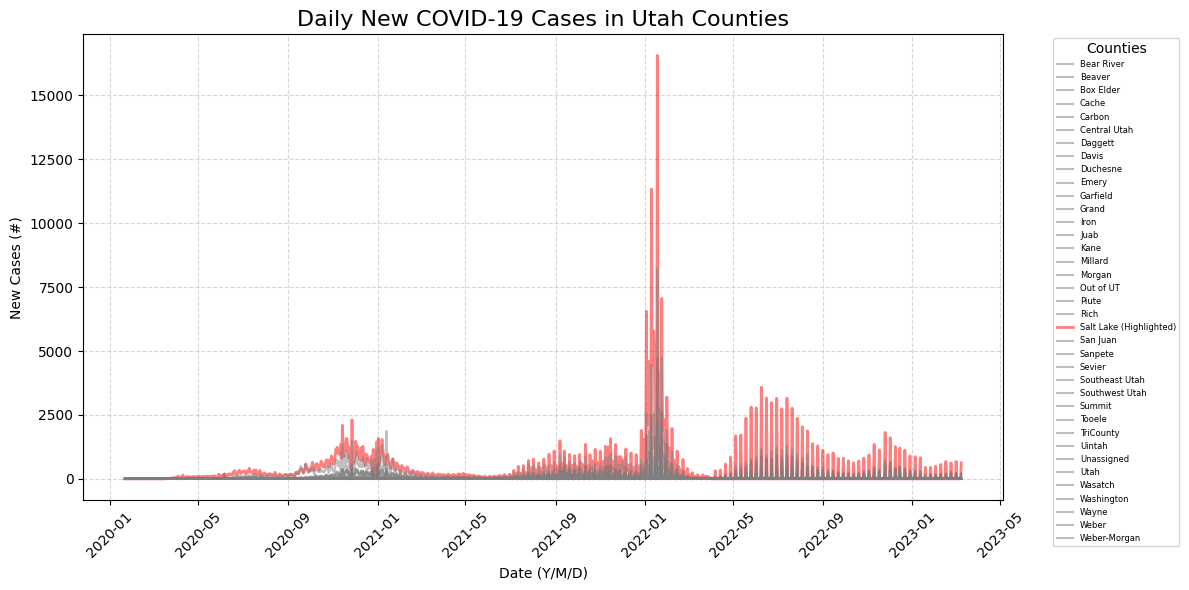

In [130]:
# Plot time series of all counties
plt.figure(figsize=(12, 6))

# Plot all counties in single background color and Salt Lake in different color 
for county in utah_melt['County'].unique():
    county_data = utah_melt[utah_melt['County'] == county]
    if county == 'Salt Lake':  # Highlight this county in red
        plt.plot(county_data['Date'], county_data['New Cases'], color='red', alpha = 0.5, linewidth=2, label=f'{county} (Highlighted)')
    else:  # Other counties plotted in grey
        plt.plot(county_data['Date'], county_data['New Cases'], color='grey', alpha=0.5, label=county)

# Formatting
plt.title('Daily New COVID-19 Cases in Utah Counties', fontsize=16)
plt.xlabel('Date (Y/M/D)', fontsize=10)
plt.ylabel('New Cases (#)', fontsize=10)
plt.legend(title="Counties", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=6) # Add legend with all counties including highlighted county
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Q2
##### Create a visualization that shows the contrast between the county in Utah with the most cases to date to a county in Florida with the most cases to date. The graphic should:
- Have only two counties plotted
- Highlight the difference between the two comparison counties

In [75]:
#create new DataFrame filtered to only Florida
fl_df = cdf[cdf['Province_State'] == 'Florida']

# Melt the Florida DataFrame, treating non-date columns as identifiers
florida_melt = fl_df.melt(
    id_vars=non_date_columns,  # Keep these columns
    var_name='Date',          # New date column
    value_name='Cases'        # New case column
)

# Convert Date format
florida_melt['Date'] = pd.to_datetime(florida_melt['Date'],format='%m/%d/%y')

#rename Admin2 to County for processing
florida_melt.rename(columns={'Admin2': 'County'}, inplace=True)

#sort values in chronological order
florida_melt = florida_melt.sort_values(by=['County', 'Date'])

#create new column - New Cases - and calculate the difference between daily cases
florida_melt['New Cases'] = florida_melt.groupby('County')['Cases'].diff().fillna(0).clip(lower=0)

#inspect new DataFrame
florida_melt.head(5)

,iso2,iso3,code3,FIPS,County,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Cases,New Cases
0,US,USA,840,12001.0,Alachua,Florida,US,29.678665,-82.359282,"Alachua, Florida, US",2020-01-22,0,0.0
69,US,USA,840,12001.0,Alachua,Florida,US,29.678665,-82.359282,"Alachua, Florida, US",2020-01-23,0,0.0
138,US,USA,840,12001.0,Alachua,Florida,US,29.678665,-82.359282,"Alachua, Florida, US",2020-01-24,0,0.0
207,US,USA,840,12001.0,Alachua,Florida,US,29.678665,-82.359282,"Alachua, Florida, US",2020-01-25,0,0.0
276,US,USA,840,12001.0,Alachua,Florida,US,29.678665,-82.359282,"Alachua, Florida, US",2020-01-26,0,0.0


In [76]:
#find county with maximum number of cases in Florida
florida_max = florida_melt[florida_melt.Cases == florida_melt.Cases.max()]
#print max county - answer = Miami-Dade
print(florida_max)

#find county with maximum number of cases in Utah
utah_max = utah_melt[utah_melt.Cases == utah_melt.Cases.max()]
#print max county - answer = Salt Lake
print(utah_max)

      iso2 iso3  code3     FIPS      County Province_State Country_Region  \
78426   US  USA    840  12086.0  Miami-Dade        Florida             US   
78495   US  USA    840  12086.0  Miami-Dade        Florida             US   
78564   US  USA    840  12086.0  Miami-Dade        Florida             US   
78633   US  USA    840  12086.0  Miami-Dade        Florida             US   
78702   US  USA    840  12086.0  Miami-Dade        Florida             US   
78771   US  USA    840  12086.0  Miami-Dade        Florida             US   
78840   US  USA    840  12086.0  Miami-Dade        Florida             US   

             Lat      Long_             Combined_Key       Date    Cases  \
78426  25.611236 -80.551706  Miami-Dade, Florida, US 2023-03-03  1552197   
78495  25.611236 -80.551706  Miami-Dade, Florida, US 2023-03-04  1552197   
78564  25.611236 -80.551706  Miami-Dade, Florida, US 2023-03-05  1552197   
78633  25.611236 -80.551706  Miami-Dade, Florida, US 2023-03-06  1552197   
787

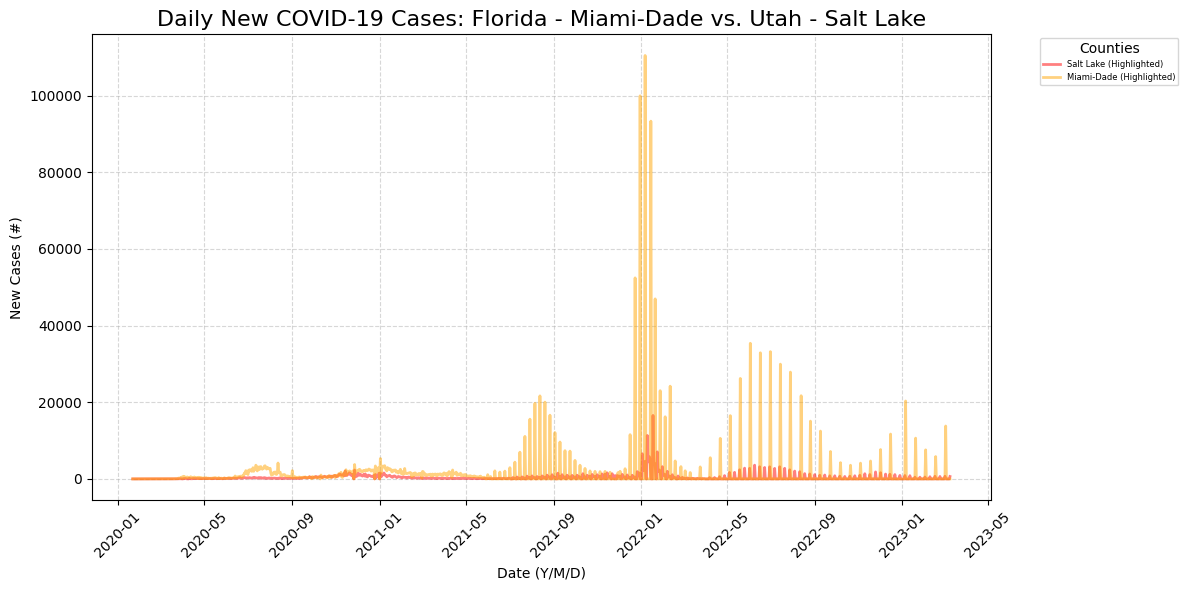

In [79]:
plt.figure(figsize=(12, 6))

for county in utah_melt['County'].unique():
    county_data = utah_melt[utah_melt['County'] == county]
    if county == 'Salt Lake':  # Highlight this county
        plt.plot(county_data['Date'], county_data['New Cases'], color='red', alpha = 0.5, linewidth=2, label=f'{county} (Highlighted)')

for county in florida_melt['County'].unique():
    county_data = florida_melt[florida_melt['County'] == county]
    if county == 'Miami-Dade':  # Select only this county
        plt.plot(county_data['Date'], county_data['New Cases'], color='orange', alpha = 0.5, linewidth=2, label=f'{county} (Highlighted)')

# Formatting
plt.title('Daily New COVID-19 Cases: Florida - Miami-Dade vs. Utah - Salt Lake', fontsize=16)
plt.xlabel('Date (Y/M/D)', fontsize=10)
plt.ylabel('New Cases (#)', fontsize=10)
plt.legend(title="Counties", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=6) # Add legend with all counties including highlighted county
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Q3
##### Create a visualization that shows BOTH the running total of cases for a single county AND the daily new cases. The graphic should:
- Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
- Use color to contrast the two series being plotted
- Have well formatted dates as the X axis

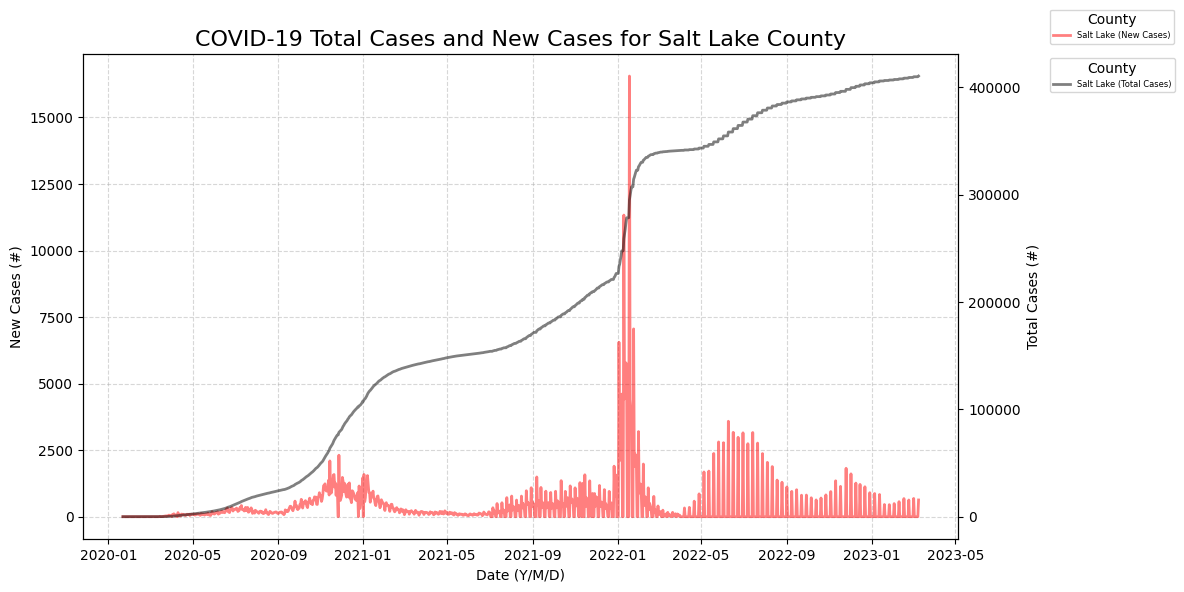

In [90]:
#Set figure size
plt.figure(figsize=(12, 6))

#Create y-axis for first plot 'New Cases'
ax1 = plt.gca()

#plot with Date vs. New Cases
for county in utah_melt['County'].unique():
    county_data = utah_melt[utah_melt['County'] == county]
    if county == 'Salt Lake':  # Highlight this county
        plt.plot(county_data['Date'], county_data['New Cases'], color='red', alpha = 0.5, linewidth=2, label=f'{county} (New Cases)')

# Create y-axis for second plot 'Cases'
ax2 = ax1.twinx()

#plot with Date vs. Cases
for county in utah_melt['County'].unique():
    county_data = utah_melt[utah_melt['County'] == county]
    if county == 'Salt Lake':  # Highlight this county
        plt.plot(county_data['Date'], county_data['Cases'], color='black', alpha = 0.5, linewidth=2, label=f'{county} (Total Cases)')
        
# Formatting
ax1.set_title('COVID-19 Total Cases and New Cases for Salt Lake County', fontsize=16)
ax1.set_xlabel('Date (Y/M/D)', fontsize=10)
ax1.set_ylabel('New Cases (#)', fontsize=10)
ax2.set_ylabel('Total Cases (#)', fontsize=10)

# Legends, position set to separate about upper right 
ax1.legend(title="County", loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=6)
ax2.legend(title="County", loc='upper left', bbox_to_anchor=(1.1, 1), fontsize=6)

# Grid and x-ticks formatting
ax1.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### Q4
##### Create a visualization that shows a stacked bar chart of county contributions to a given state's total cases. You may choose any state (or states). The graphic should:
- Have a single column delineate a state
- Have each 'slice' or column compontent represent a county

In [93]:
#filter to find the final/max case count in every county
utah_final = utah_melt[utah_melt['Date'] == '3/9/23'] #3/9/23 is the last date containing data therefore is the max cases


,iso2,iso3,code3,FIPS,County,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Cases,New Cases
42254,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,"Bear River, Utah, US",2023-03-09,58205,74.0
42255,US,USA,840,49001.0,Beaver,Utah,US,38.356571,-113.234223,"Beaver, Utah, US",2023-03-09,0,0.0
42256,US,USA,840,49003.0,Box Elder,Utah,US,41.521068,-113.083282,"Box Elder, Utah, US",2023-03-09,0,0.0
42257,US,USA,840,49005.0,Cache,Utah,US,41.723306,-111.744367,"Cache, Utah, US",2023-03-09,0,0.0
42258,US,USA,840,49007.0,Carbon,Utah,US,39.648348,-110.587251,"Carbon, Utah, US",2023-03-09,0,0.0


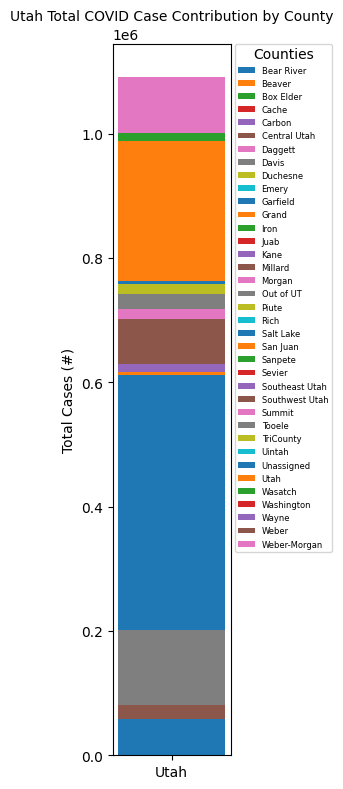

In [114]:
# Sort by county (alphabetical) 
utah_final = utah_final.sort_values(by='County', ascending=True)

#variable creation for stacking
ut_counties = utah_final['County']
ut_cases = utah_final['Cases']

#define plot size
plt.figure(figsize=(3, 8))

# Start the bottom of the stack chart at 0
bottom = 0

# Loop through each county and stack its cases
for county, case in zip(ut_counties, ut_cases):
    plt.bar('Utah', case, bottom=bottom, label=county)  # Single state column 'Utah'
    bottom += case  # Update the bottom for stacking which starts at 0 by definition above

# Formatting
plt.title('Utah Total COVID Case Contribution by County', fontsize=10)
plt.ylabel('Total Cases (#)', fontsize=10)
plt.legend(title="Counties", bbox_to_anchor=(1, 1.005), fontsize=6)
plt.tight_layout()

plt.show()


### EXTRA
##### Use Seaborn to create a grouped box plot of all reported states. Each boxplot should be a distinct state. Have the states ordered from most cases (FL) to fewest cases.

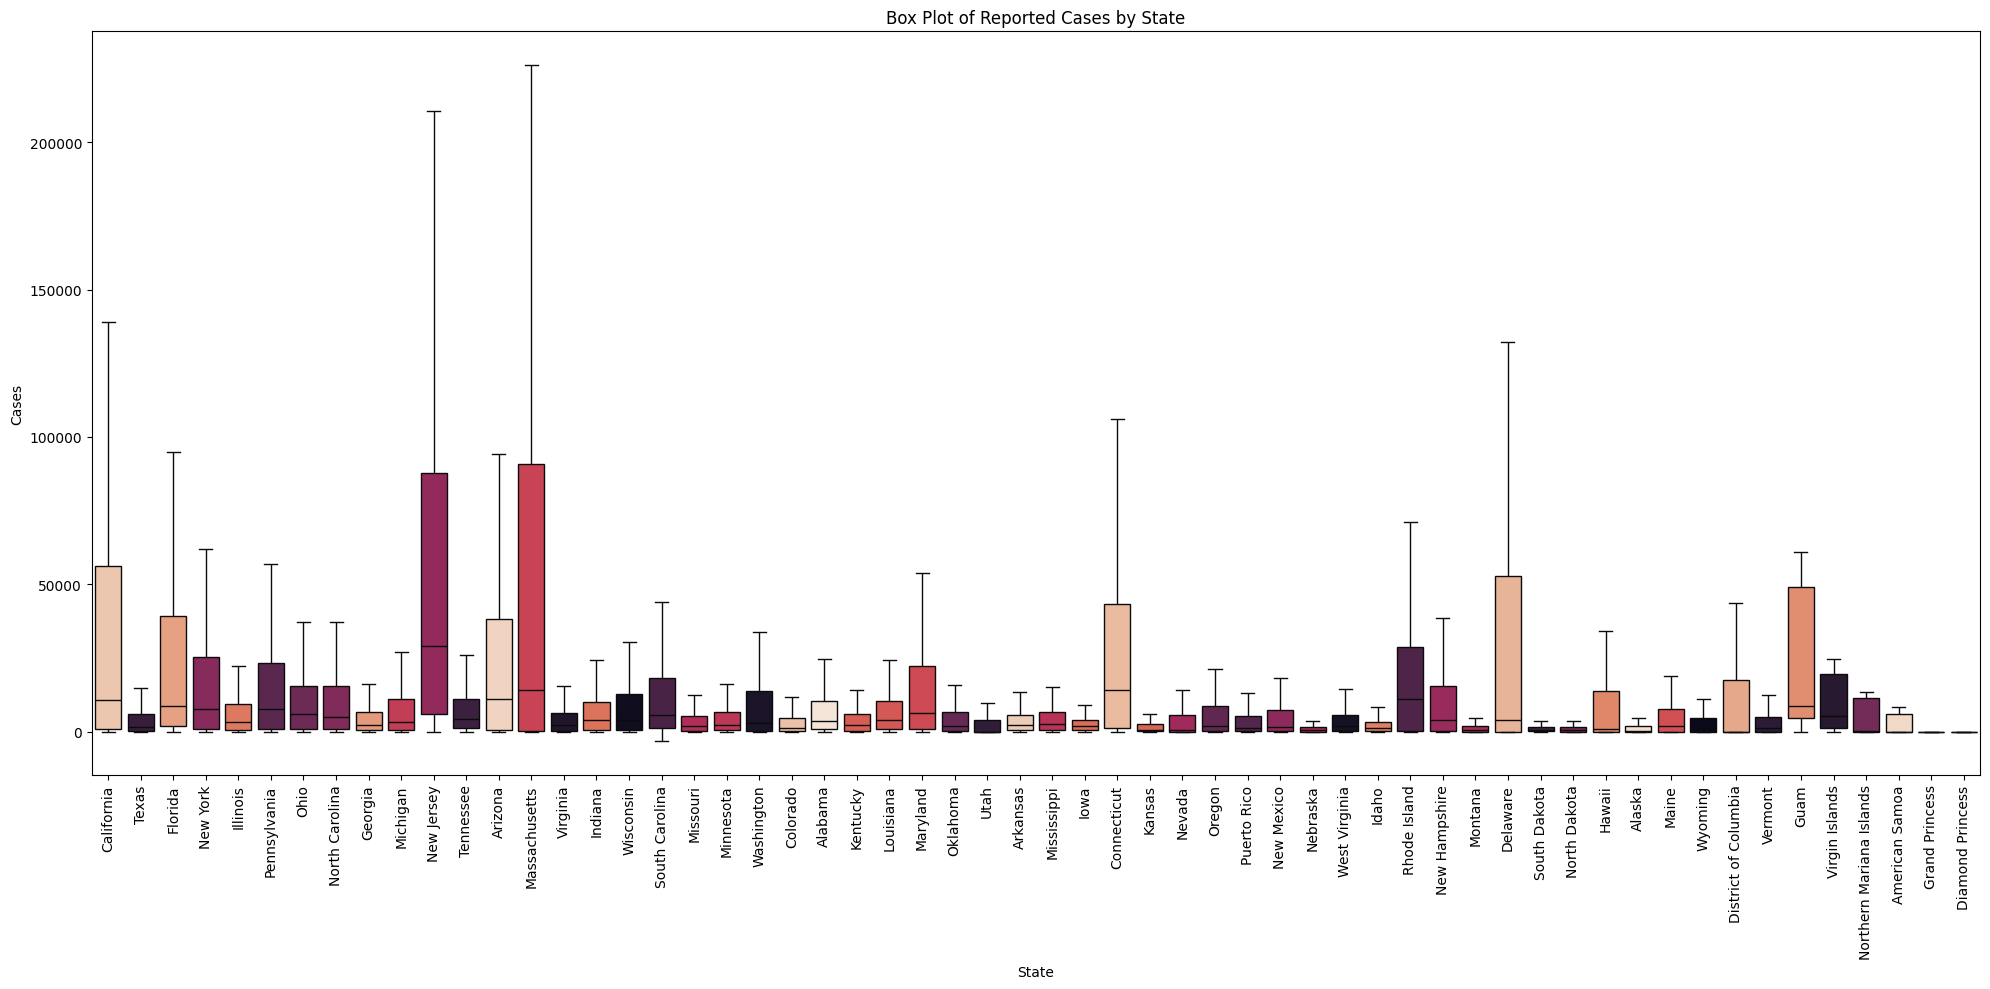

In [131]:
#Non-date columns
non_date_columns_seaborn = ['iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key']

# Melt DataFrame 
totals_melt = cdf.melt(
    id_vars=non_date_columns_seaborn,  # These stay as columns
    var_name='Date',          # New column for dates
    value_name='Cases'        # New column for case counts
)

# Sort states by total cases - groupby state and sum all the values then sort in descending order 
state_totals = totals_melt.groupby('Province_State')['Cases'].sum().sort_values(ascending=False)

#Create the plot
plt.figure(figsize=(20, 10))

# Use the melted DataFrame and the sorted order from state_totals
sns.boxplot(
    x='Province_State', 
    y='Cases', 
    data=totals_melt, 
    order=state_totals.index,
    hue = 'Province_State',
    showfliers=False, #removes outlier display as the output is poort visually with this included given variability of outliers
    palette='rocket_r', #use rocket_r color scheme 
)


# Formatting
plt.title('Box Plot of Reported Cases by State', fontsize=12)
plt.xlabel('State', fontsize=10)
plt.ylabel('Cases', fontsize=10)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

plt.show()

